In [ ]:
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())
import tensorflow as tf
print(tf.__version__)

angry
disgust
fear
happy
neutral
sad
surprise


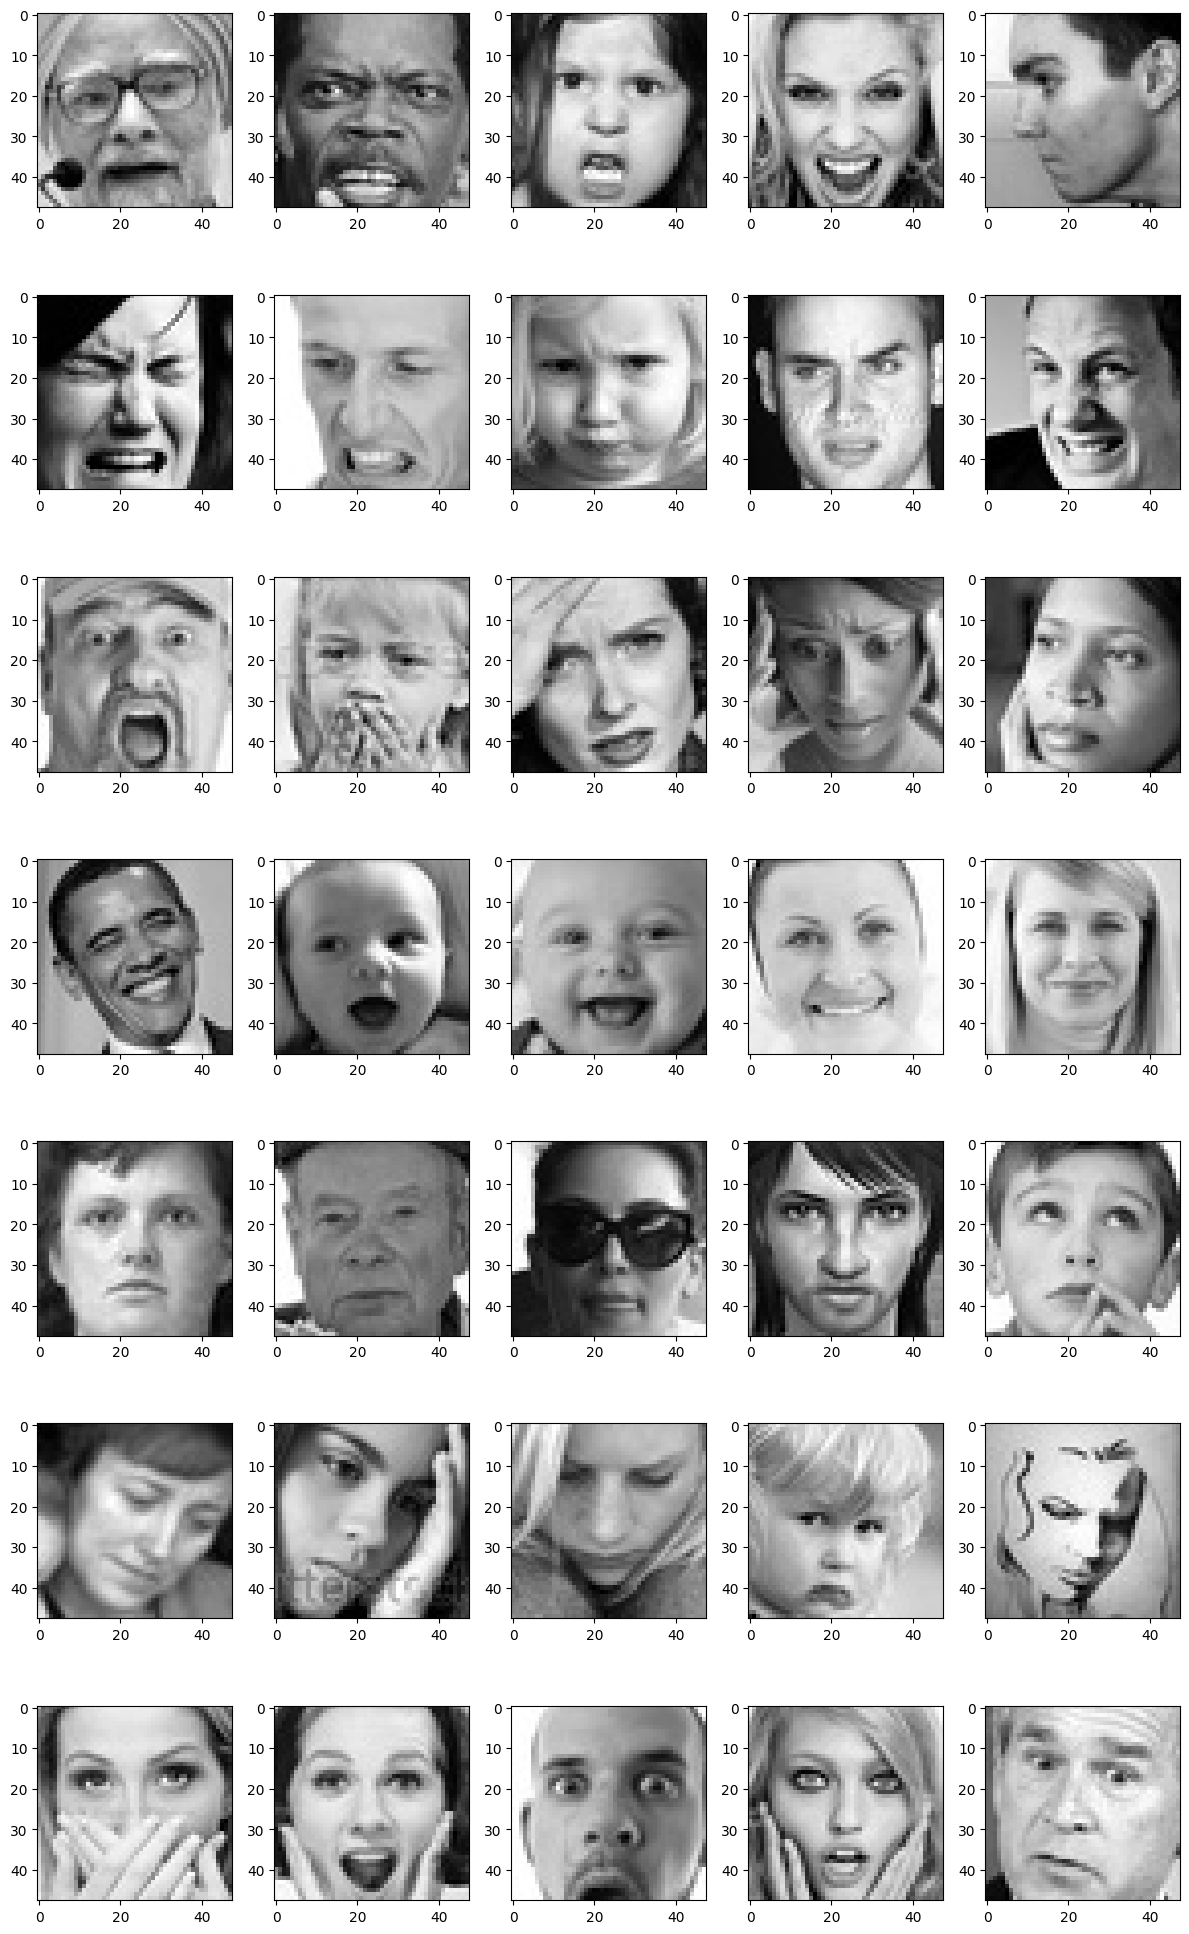

In [14]:
from PIL import Image
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import os
# from keras.preprocessing.image import load_img, img_to_array

emotions = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

img_path_train = '../datasets/train/'
img_path_validation = '../datasets/validation/'
plt.figure(0, figsize=(12,20))
pic_size = 48
cnt = 0
for expression in emotions:
    print(expression)
    for i in range(1,6):
        cnt = cnt + 1
        plt.subplot(7,5,cnt)
        img = Image.open(img_path_train + expression + '/' +os.listdir(img_path_train + expression)[i], 'r')
        plt.imshow(img, cmap="gray")
plt.tight_layout()
plt.show()



In [15]:
# building data generator 

from keras.preprocessing.image import ImageDataGenerator

batch_size = 128


train_datagen = ImageDataGenerator(rescale = 1.0/255.0,
                                  width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   rotation_range = 20,
                                   horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale= 1.0/255)

train_generator = train_datagen.flow_from_directory(img_path_train,
                                                    target_size=(56,56),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

validation_generator = validation_datagen.flow_from_directory(img_path_validation,
                                                    target_size=(56,56),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [20]:
from keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from keras.optimizers import Adam

# number of possible label values
nb_classes = 7

# Initialising the CNN
model = Sequential()

#Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(56, 56,1)))
model.add(Activation('relu'))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dense(nb_classes, activation='softmax'))

print(model.summary())

opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        640       
                                                                 
 activation_4 (Activation)   (None, 56, 56, 64)        0         
                                                                 
 flatten_2 (Flatten)         (None, 200704)            0         
                                                                 
 dense_4 (Dense)             (None, 256)               51380480  
                                                                 
 activation_5 (Activation)   (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 7)                 1799      
                                                                 
Total params: 51,382,919
Trainable params: 51,382,919


In [21]:
# number of epochs to train the NN
epochs = 5

# checkpoint to save best model
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
with tf.device('/gpu:0'):
    history = model.fit_generator(generator=train_generator,
                                    steps_per_epoch=train_generator.n//train_generator.batch_size,
                                    epochs=epochs,
                                    validation_data = validation_generator,
                                    validation_steps = validation_generator.n//validation_generator.batch_size,
                                    callbacks=callbacks_list
                                    )

Epoch 1/2


C:\Users\Woodkid\AppData\Local\Temp\ipykernel_3200\1259176751.py:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_generator,


225/225 [==============================] - ETA: 0s - loss: 2.3027 - accuracy: 0.2477
Epoch 1: val_accuracy improved from -inf to 0.31207, saving model to model_weights.h5
225/225 [==============================] - 97s 428ms/step - loss: 2.3027 - accuracy: 0.2477 - val_loss: 1.7366 - val_accuracy: 0.3121
Epoch 2/2
225/225 [==============================] - ETA: 0s - loss: 1.7373 - accuracy: 0.2985
Epoch 2: val_accuracy improved from 0.31207 to 0.36491, saving model to model_weights.h5
225/225 [==============================] - 96s 427ms/step - loss: 1.7373 - accuracy: 0.2985 - val_loss: 1.6685 - val_accuracy: 0.3649
